# MAIN NOTEBOOK
In this notebook, we begin to perform analyses on the previously processed datasets.
The initial BeerAdvocate and Ratebeer datasets were modified as follows:
- Removal of duplicates
- Adjustment and correction of location formatting
- Consistency check on data types for each column
- Removal of beers that had nbr_ratings==0 and nbr_reviews==0 (in particular, this filtering removes a few beers from the dataset, but these have no relative rating, so are not useful for the type of analysis we are interested in doing)

In [3]:
import pandas as pd
import numpy as np
import utils
import importlib
import matplotlib.pyplot as plt
importlib.reload(utils)
#import src.utils as utils
#importlib.reload(src.utils)

<module 'utils' from '/Users/arimongomis/Desktop/EPFL/ADA/ada-2024-project-mediterranean/src/analysis0/utils.py'>

In [9]:
original_PATH = '../../data/Original'
processed_PATH = '../../data/Processed'

In [39]:
# Loading Data non-processed
beer_ba = pd.read_csv(original_PATH + '/BeerAdvocate/beers.csv')
breweries_ba = pd.read_csv(original_PATH + '/BeerAdvocate/breweries.csv')
users_ba = pd.read_csv(original_PATH + '/BeerAdvocate/users.csv')
beer_rb = pd.read_csv(original_PATH + '/RateBeer/beers.csv')
breweries_rb = pd.read_csv(original_PATH + '/RateBeer/breweries.csv')
users_rb = pd.read_csv(original_PATH + '/RateBeer/users.csv')

In [40]:
# Loading Data Processed
beer_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/beers_processed.csv')
breweries_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/breweries_processed.csv')
users_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/users_processed.csv')
beer_RB = pd.read_csv(processed_PATH + '/RateBeer/beers_processed.csv')
breweries_RB = pd.read_csv(processed_PATH + '/RateBeer/breweries_processed.csv')
users_RB = pd.read_csv(processed_PATH + '/RateBeer/users_processed.csv')

/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_39359/3069750171.py:5: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.



In [41]:
# Let's do an example on the beer_ba dataset
utils.check_differences(beer_rb, beer_RB, 'RateBeer','Processed RateBeer')
utils.check_differences(beer_ba, beer_BA, 'BeerAdvocate','Processed BeerAdvocate')

The starting dimensions of dataset RateBeer was: (442081, 14)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
The processed dataset Processed RateBeer  has dimensions: (396690, 20)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name_x', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings', 'brewery_name_y', 'location',
       'location_region', 'US', 'UK', 'Canada'],
      dtype='object')
The starting dimensions of dataset BeerAdvocate was: (280823, 15)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscor

In [42]:
beer_BA.head()

,beer_id,beer_name,brewery_id,brewery_name_x,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,...,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,brewery_name_y,location,location_region,US,UK,Canada
0,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1,1,2.88,NaN,NaN,...,2.880000,NaN,0,NaN,Societe des Brasseries du Gabon (SOBRAGA),Gabon,NaN,False,False,False
1,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,4,3.85,NaN,NaN,...,3.845000,NaN,0,NaN,Strangford Lough Brewing Company Ltd,United Kingdom,Northern Ireland,False,True,False
2,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,80.0,80.0,...,3.439867,-0.649167,59,3.504068,Strangford Lough Brewing Company Ltd,United Kingdom,Northern Ireland,False,True,False
3,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,6,3.86,NaN,NaN,...,3.888750,0.093110,6,3.768333,Strangford Lough Brewing Company Ltd,United Kingdom,Northern Ireland,False,True,False
4,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,82.0,90.0,...,3.556094,-0.478579,48,3.580417,Strangford Lough Brewing Company Ltd,United Kingdom,Northern Ireland,False,True,False


In [43]:
users_BA.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,location_region,US,UK,Canada
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,United States,Washington,True,False,False
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,United States,New York,True,False,False
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,United Kingdom,Northern Ireland,False,True,False
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,United Kingdom,Northern Ireland,False,True,False
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,United Kingdom,Northern Ireland,False,True,False


## USERS ANALYSIS
### Variation of users in platform during time per location 

**Goal**: Understand the geographic and demographic distribution of user bases within each dataset to assess their representativeness.

**Approach**: We now want to investigate **how the number of users has changed over time and by location**. What we do is to divide the users by year and by 'location' by counting how many users there are for each location for each year. 
We convert the result to a pivot table, with year_joined as index and location as columns, and user counts as values. We set fill_value=0 to fill any empty cells (years and locations without users) with zero.
*Note:* We need to perform a cumulative sum because the users who register in a given year add up to those who were already registered in previous years. So, I want to know the total number of users for each year and how they are distributed by location.
Consider weighting techniques to ensure overrepresented areas do not skew global findings.

In [44]:
table_users_BA = utils.nbr_user_per_location_per_time(users_BA, 'BeerAdvocate Processed')
table_users_RB = utils.nbr_user_per_location_per_time(users_RB, 'RateBeer Processed')

*Note:* The table rows created can be of great help in understanding who is doing the reviews and how much each location is contributing to the overall preference

In [45]:
table_users_RB.head()

location,Abkhazia,Afghanistan,Albania,Algeria,American Samoa,Andorra,Antigua and Barbuda,Argentina,Armenia,Ascension Island,...,Vatican City,Venezuela,Vietnam,Virgin Islands (British),Virgin Islands (U.S.),Wales,Yemen,Zambia,Zimbabwe,Total
year_joined,,,,,,,,,,,,,,,,,,,,,
2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0
2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,890.0
2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,2292.0
2003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,9.0,0.0,0.0,2.0,3364.0
2004.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,12.0,0.0,0.0,2.0,5116.0


In [46]:
# Interactive graph allowing me to visualise how membership of review sites has changed over the years for each location
#utils.plot_user_per_location_per_time_interactive(table_users_RB, 'RateBeer',15)
utils.plot_user_per_location_per_time_interactive(table_users_BA, 'BeerAdvocate',15)

Top 5 locations: ['United States', 'Canada', 'United Kingdom', 'Australia', 'Germany']


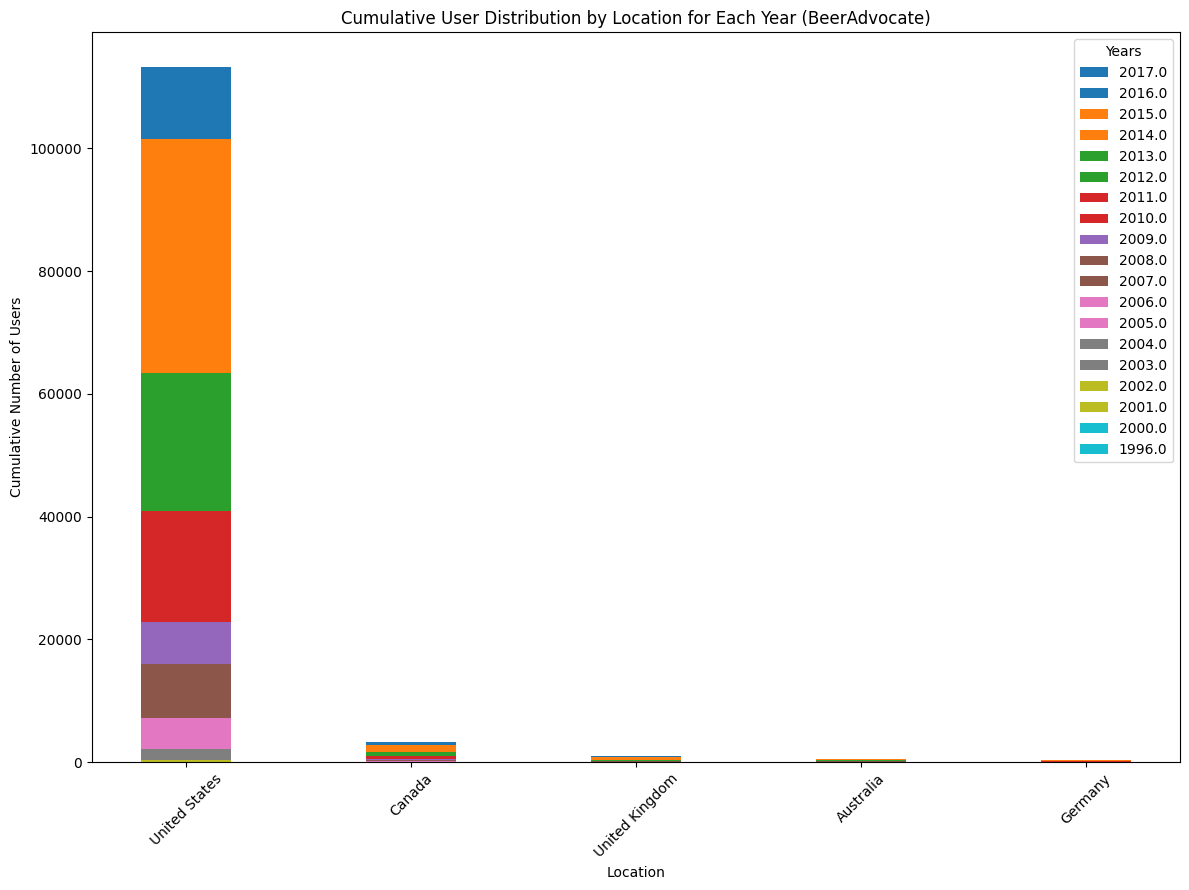

In [47]:
# Static plot allowing me to visualise how membership of review sites has changed over the years for each location (cumulative plot)
#n_most_used_location_RB = utils.plot_user_per_location_per_time_cumulative(table_users_RB, 'RataBeer', 10)
n_most_used_location_BA = utils.plot_user_per_location_per_time_cumulative(table_users_BA, 'BeerAdvocate', 5)

Let us identify and visualise what has been the change over time of the n locations where the site is most used. As we can see, in the US the site has a whirlwind growth, while in other continents the growth is existing but less pronounced. 
This leads us to reflect on the need to conduct a separate analysis for states within the US to investigate whether there are differences within US states or whether preferences are shared across the continent

/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_39359/1251131141.py:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



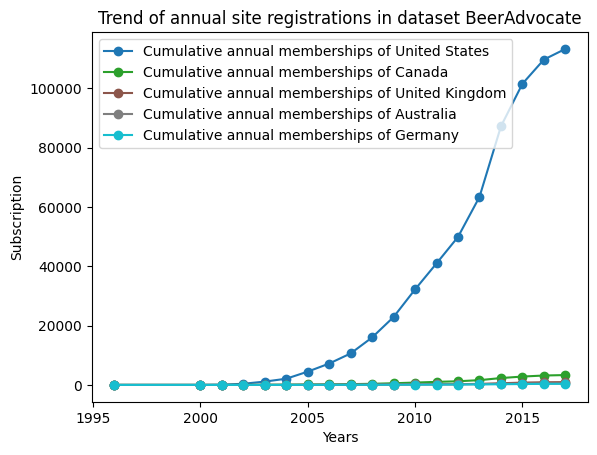

In [48]:
colors = plt.cm.get_cmap('tab10', len(n_most_used_location_BA))  # Using 'tab10' colormap 
for i,loc in enumerate(n_most_used_location_BA):
    utils.time_machine(table_users_BA, 'BeerAdvocate', loc, colors(i))

Observing the following chart, it’s clear that over the years, the contribution of different countries to beer ratings changes drastically. Therefore, it’s important to consider this aspect when we later evaluate global preferences.

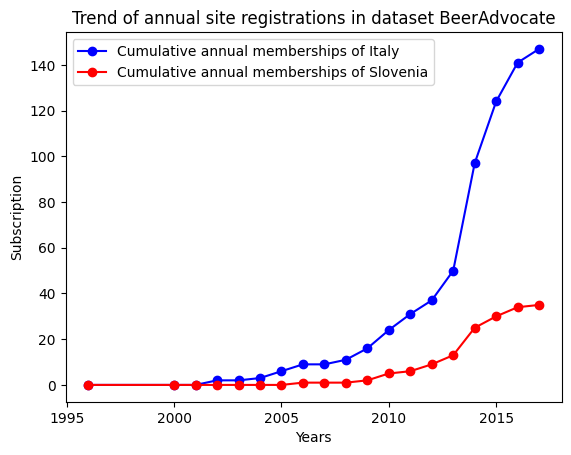

In [49]:
utils.time_machine(table_users_BA, 'BeerAdvocate', 'Italy')
utils.time_machine(table_users_BA, 'BeerAdvocate', 'Slovenia', 'r')

## BREWER ANALYSIS
### Distribution of breweres all over the World 
Goal: Understand the geographic and demographic distribution of breweries bases within each dataset to assess their representativeness.

Approach: In this part, we want to analyse the **geographical distribution** of **breweries** in order to better understand user distribution data.Consider weighting techniques to ensure overrepresented areas do not skew global findings.

In [50]:
#breweries_RB.head()
breweries_BA.head()

,id,location,brewery_name,nbr_beers,location_region,US,UK,Canada
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,NaN,False,False,False
1,39913,Kyrgyzstan,Arpa (АРПА),1,NaN,False,False,False
2,39914,Kyrgyzstan,Bear Beer,4,NaN,False,False,False
3,39915,Kyrgyzstan,Blonder Pub,4,NaN,False,False,False
4,39916,Kyrgyzstan,Kellers Bier,2,NaN,False,False,False


In [51]:
dist_RB = utils.loc_distribution(breweries_RB, 'RateBeer', 'location')
dist_BA = utils.loc_distribution(breweries_BA, 'BeerAdvocate', 'location')
dist_RB_US = utils.loc_distribution(breweries_RB[breweries_RB['US']==True], 'RateBeer_US', 'location_region')
dist_BA_US = utils.loc_distribution(breweries_BA[breweries_BA['US']==True], 'BeerAdvocate_US', 'location_region') 

Dataset: RateBeer
- Number of unique "location" value in the dataset: 214
Dataset: BeerAdvocate
- Number of unique "location" value in the dataset: 197
Dataset: RateBeer_US
- Number of unique "location" value in the dataset: 1
Dataset: BeerAdvocate_US
- Number of unique "location" value in the dataset: 1


In [52]:
# Let's take a look on the top_boundaries of our dataset
# We can notice that the max number of beer for brewer in BA dataset is way highter than in RB
print('Max number of beer for BA:', breweries_BA['nbr_beers'].max(),'\nMax number of beer for RB:',breweries_RB['nbr_beers'].max())
#breweries_BA[breweries_BA['nbr_beers']==max(breweries_BA['nbr_beers'])].groupby('location').size()

Max number of beer for BA: 1196 
Max number of beer for RB: 295


/Users/arimongomis/Desktop/EPFL/ADA/ada-2024-project-mediterranean/src/analysis0/utils.py:295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



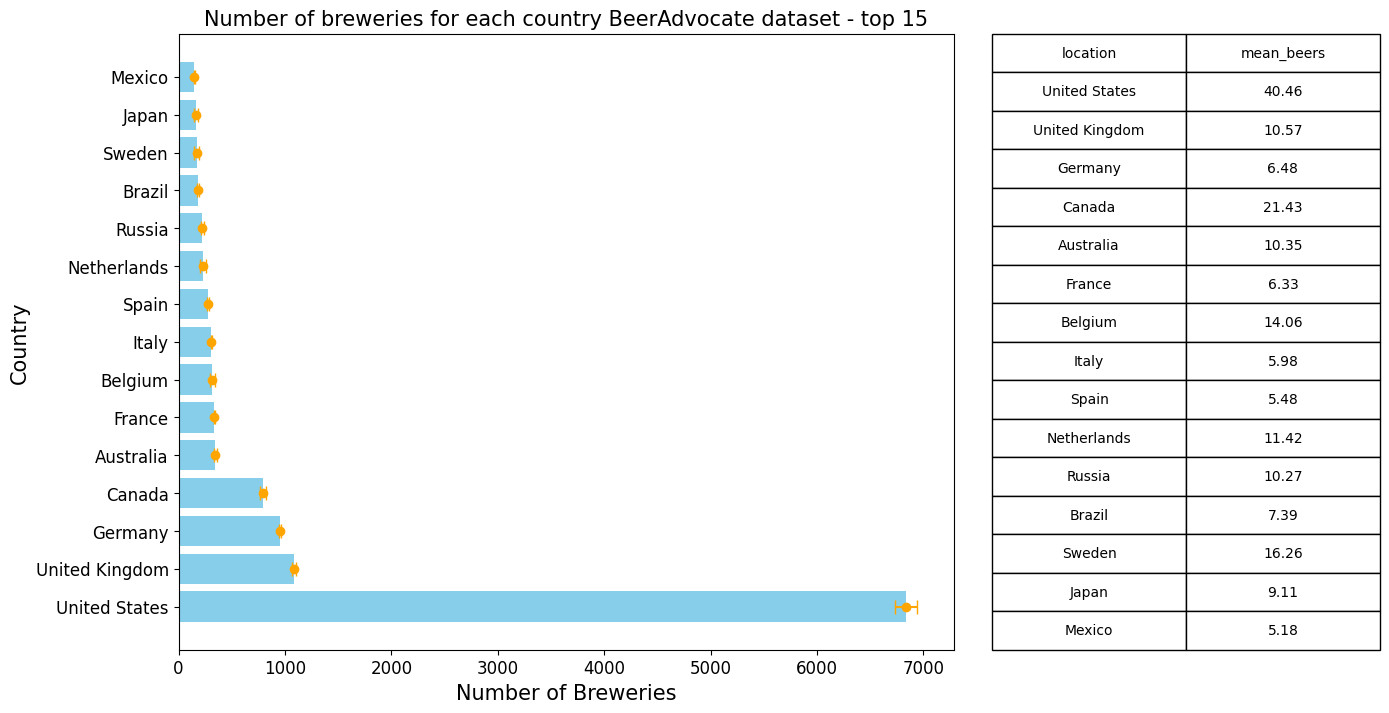

In [53]:
#utils.plotting_dist(dist_RB,'RateBeer',n=15)
utils.plotting_dist(dist_BA,'BeerAdvocate',n=15)

As we can see from the chart and especially from the table on the side, the average number of beers per brewery varies significantly even between the first and second place!

In [54]:
dist_BA_US.head()

,location_region,brewery_count,total_beers,mean_beers,std_beers,median_beers
0,Alabama,41,791,19.292683,20.296852,14.0
1,Alaska,37,1178,31.837838,38.763896,20.0
2,Arizona,107,7495,70.046729,224.404595,19.0
3,Arkansas,30,502,16.733333,12.156830,13.0
4,California,863,35587,41.236385,107.162451,15.0


/Users/arimongomis/Desktop/EPFL/ADA/ada-2024-project-mediterranean/src/analysis0/utils.py:295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



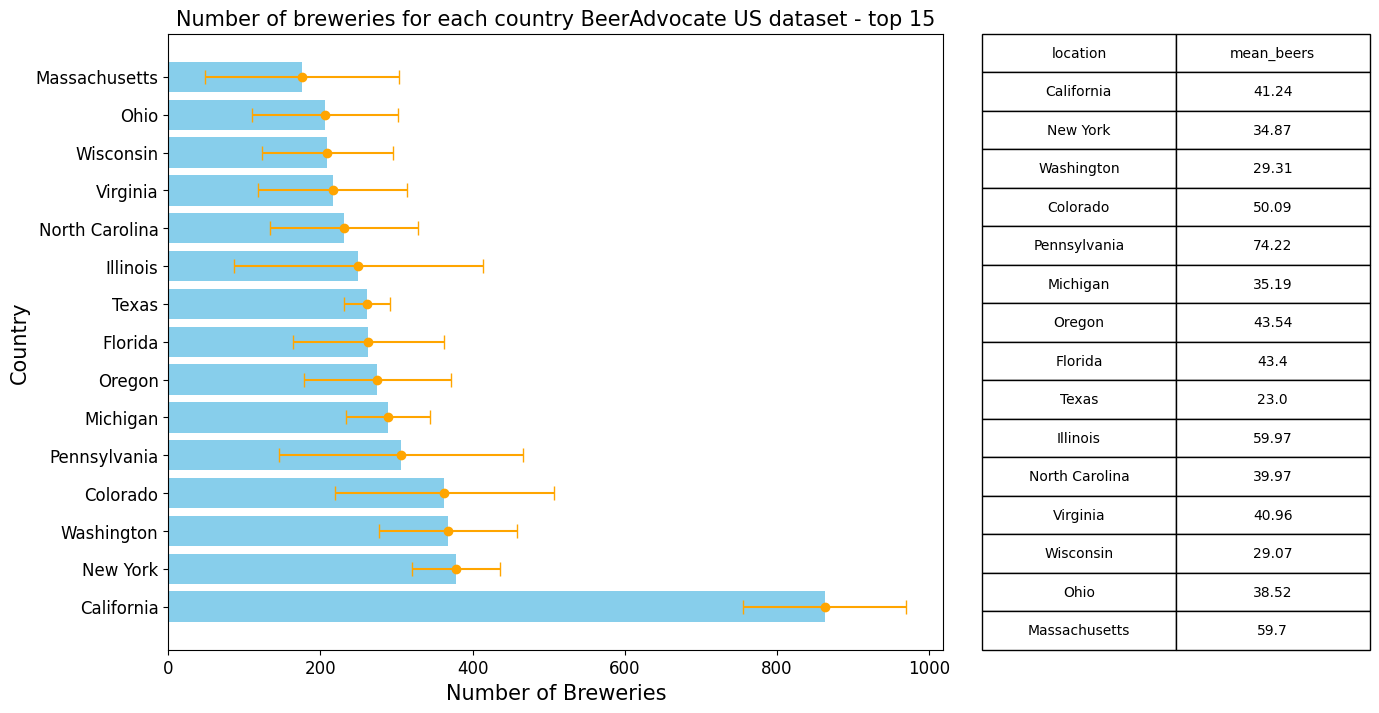

In [55]:
# Rename the ‘location_region’ column to ‘location’ for both DataFrames
dist_RB_US = dist_RB_US.rename(columns={'location_region': 'location'})
dist_BA_US = dist_BA_US.rename(columns={'location_region': 'location'})

utils.plotting_dist(dist_BA_US,'BeerAdvocate US',n=15)

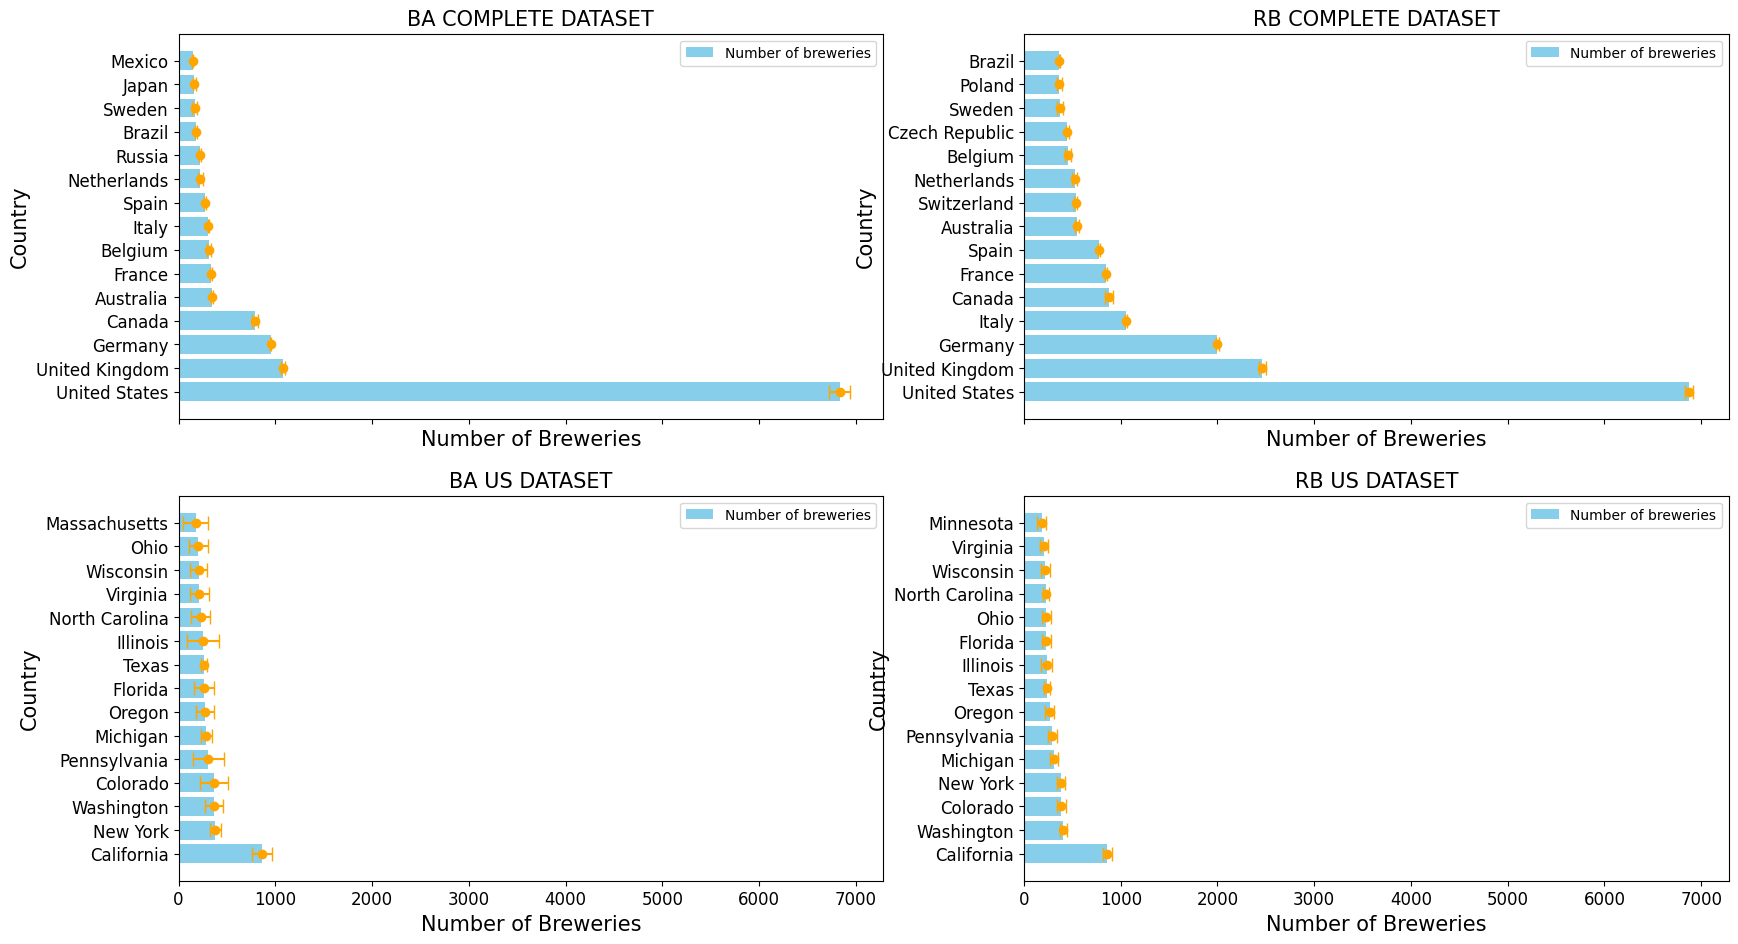

In [56]:
utils.comparing_plot(dist_BA, dist_RB, dist_BA_US, dist_RB_US)

This chart is highly informative as it allows us to see how breweries are distributed in both datasets, both globally and within the US (which clearly constitutes the majority).

## BEER ANALYSIS
### Top-Rated Beers per Year & Global Favorites
**Goal**: Identify annual and global top-ranked beers across continents.

**Approach**: Extract yearly scores from each dataset, normalizing ratings to adjust for different scoring systems, and use ranking algorithms to determine yearly favorites. Evaluate consistency across datasets to ensure merged rankings maintain integrity.

We'll work with the pre-processed dataframes

In [57]:
# Rate Beer
beer_RB.tail()

,beer_id,beer_name,brewery_id,brewery_name_x,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,brewery_name_y,location,location_region,US,UK,Canada
396685,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN,Stefani & Co,Albania,NaN,False,False,False
396686,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN,Hotel Martini,Albania,NaN,False,False,False
396687,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN,Rozafa Brewery,Albania,NaN,False,False,False
396688,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN,Svejk Beer Garden,Albania,NaN,False,False,False
396689,220898,Svejk Dark,17155,Svejk Beer Garden,Dunkel/Tmavý,3,NaN,NaN,2.55,NaN,2.133333,NaN,0,NaN,Svejk Beer Garden,Albania,NaN,False,False,False


In [58]:
# Beer Advocate
beer_BA.tail()

,beer_id,beer_name,brewery_id,brewery_name_x,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,...,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,brewery_name_y,location,location_region,US,UK,Canada
166644,19149,Diamond Stout,885,Summit Station Restaurant & Brewery,Irish Dry Stout,3,3,3.83,NaN,NaN,...,3.830000,NaN,0,NaN,Summit Station Restaurant & Brewery,United States,Maryland,True,False,False
166645,19142,IPA,885,Summit Station Restaurant & Brewery,English India Pale Ale (IPA),2,2,3.24,NaN,NaN,...,3.240000,NaN,0,NaN,Summit Station Restaurant & Brewery,United States,Maryland,True,False,False
166646,19141,Irvington Pale Ale,885,Summit Station Restaurant & Brewery,American Pale Ale (APA),3,3,3.60,NaN,NaN,...,3.596667,NaN,0,NaN,Summit Station Restaurant & Brewery,United States,Maryland,True,False,False
166647,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,...,2.713333,NaN,0,NaN,Summit Station Restaurant & Brewery,United States,Maryland,True,False,False
166648,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,...,3.250000,NaN,0,NaN,Summit Station Restaurant & Brewery,United States,Maryland,True,False,False


We need to study the score metrics of each beer dataset to know what we're dealing with.

* Overall score on Rate Beer: Score of the beer with respect to all others
* BA score: on Beer Advocate, takes into account as well its style
* There is also Style Score on Rate Beer

In [60]:
duplicate_beer_ids = beer_RB['beer_id'][beer_RB['beer_id'].duplicated()]

# To see each duplicate `beer_id` with their occurrences
duplicate_counts = beer_RB['beer_id'].value_counts()
duplicates = duplicate_counts[duplicate_counts > 1]
print(duplicates)

Series([], Name: count, dtype: int64)


In [63]:
print(f"Nan values on BA score {np.round(beer_BA['ba_score'].isnull().sum()/len(beer_BA),2)*100}%")
print(f"Nan values on RB score {np.round(beer_RB['overall_score'].isnull().sum()/len(beer_RB),2)*100}%")

Nan values on BA score 64.0 %
Nan values on RB score 74.0 %


In [ ]:
print(f"Nan values on BA avg {np.round(beer_BA['avg'].isnull().sum()/len(beer_BA),2)*100}%")
print(f"Nan values on RB avg {np.round(beer_RB['avg'].isnull().sum()/len(beer_RB),2)*100}%")

Nan values on BA score 0.0%
Nan values on RB score 0.0%


### Beer Advocate Dataset

There are two approaches:
* Keep only entries with non null BA score
* Work with the average score (over 5) (no null entries)

#### AVERAGE SCORE
First, we'll normalize the average score. 

In [68]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

# Reshape the column into a 2D array (required by Scikit-learn)
beer_BA['z_score_avg'] = scaler.fit_transform(beer_BA[['avg']])
beer_BA.head()

,beer_id,beer_name,brewery_id,brewery_name_x,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,...,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,brewery_name_y,location,location_region,US,UK,Canada,z_score_avg
0,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1,1,2.88,NaN,NaN,...,NaN,0,NaN,Societe des Brasseries du Gabon (SOBRAGA),Gabon,NaN,False,False,False,-1.696410
1,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,4,3.85,NaN,NaN,...,NaN,0,NaN,Strangford Lough Brewing Company Ltd,United Kingdom,Northern Ireland,False,True,False,0.286253
2,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,80.0,80.0,...,-0.649167,59,3.504068,Strangford Lough Brewing Company Ltd,United Kingdom,Northern Ireland,False,True,False,-0.531340
3,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,6,3.86,NaN,NaN,...,0.093110,6,3.768333,Strangford Lough Brewing Company Ltd,United Kingdom,Northern Ireland,False,True,False,0.306693
4,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,82.0,90.0,...,-0.478579,48,3.580417,Strangford Lough Brewing Company Ltd,United Kingdom,Northern Ireland,False,True,False,-0.306502


Summary statistics for each column:

In [73]:
beer_BA.describe()

,beer_id,brewery_id,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,z_score_avg
count,166649.000000,166649.000000,166649.000000,166649.000000,166649.000000,59266.000000,5702.000000,144879.000000,166649.000000,27218.000000,166649.000000,27218.000000,1.666490e+05
mean,118304.063271,17174.929871,49.216653,15.539163,3.709953,84.632673,84.806559,6.566462,3.704505,-0.373299,1.727577,3.746018,2.073868e-16
std,82294.748008,14573.636775,298.336124,88.846266,0.489242,4.109008,10.507735,2.138165,0.473383,0.785330,22.424518,0.476113,1.000003e+00
min,3.000000,1.000000,1.000000,1.000000,1.000000,46.000000,31.000000,0.010000,1.000000,-6.655704,0.000000,1.000000,-5.539097e+00
25%,50831.000000,1853.000000,2.000000,1.000000,3.500000,83.000000,81.000000,5.000000,3.500000,-0.733621,0.000000,3.523333,-4.291410e-01
50%,95991.000000,16111.000000,5.000000,2.000000,3.780000,85.000000,87.000000,6.000000,3.772000,-0.282919,0.000000,3.806667,1.431741e-01
75%,184603.000000,30176.000000,17.000000,5.000000,4.020000,87.000000,91.000000,7.600000,4.000000,0.112990,0.000000,4.040000,6.337299e-01
max,293285.000000,49815.000000,16509.000000,3899.000000,5.000000,100.000000,100.000000,67.500000,5.000000,2.211576,2968.000000,5.000000,2.636833e+00


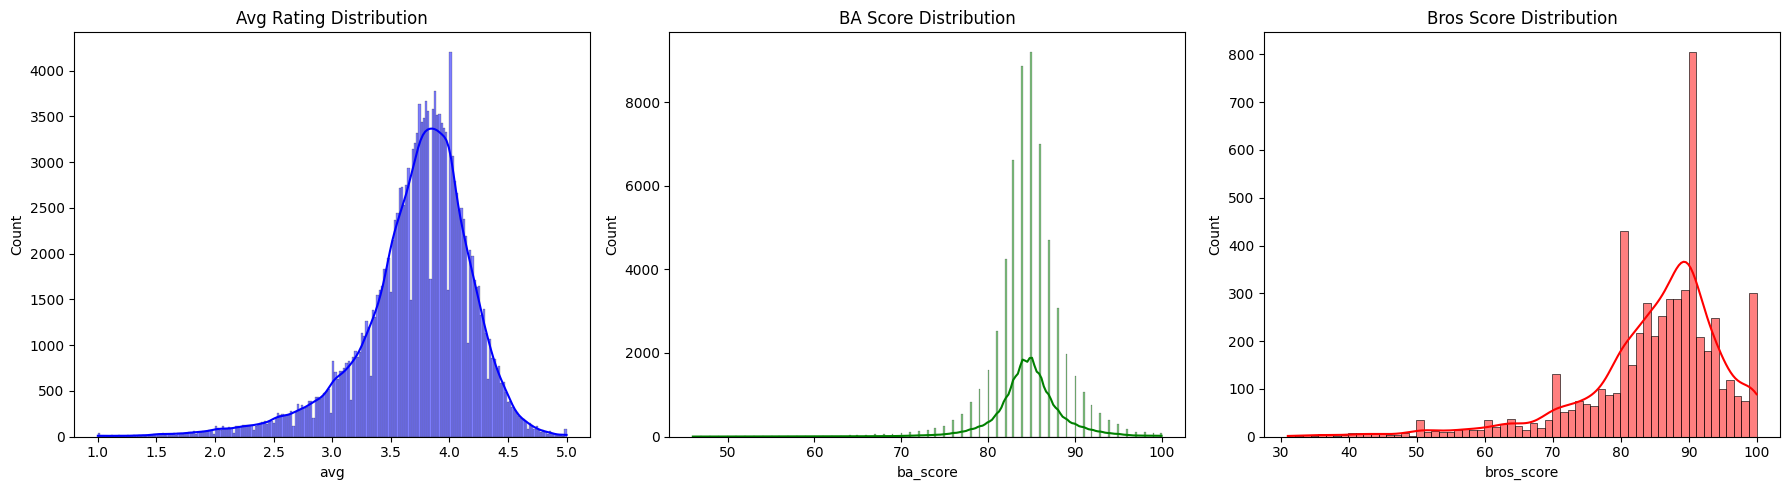

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for the ratings columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(beer_BA['avg'], kde=True, ax=axes[0], color='blue').set(title='Avg Rating Distribution')
sns.histplot(beer_BA['ba_score'], kde=True, ax=axes[1], color='green').set(title='BA Score Distribution')
sns.histplot(beer_BA['bros_score'], kde=True, ax=axes[2], color='red').set(title='Bros Score Distribution')

plt.tight_layout()
plt.show()

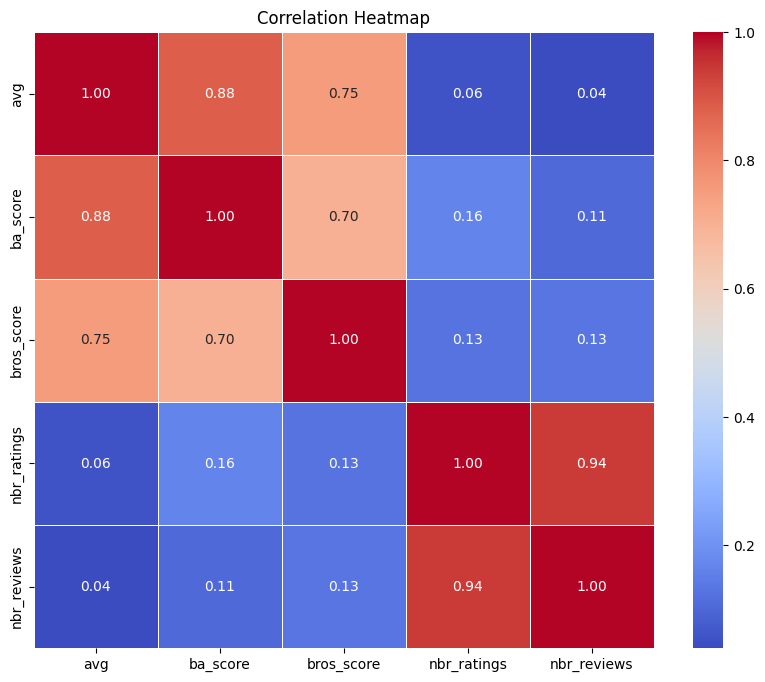

In [75]:
# Calculate correlation matrix

correlation_matrix = beer_BA[['avg', 'ba_score', 'bros_score', 
                              'nbr_ratings', 'nbr_reviews']].corr()

# Display the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [76]:
# Sort beers by average rating in descending order
top_beers = beer_BA[['beer_name', 'avg']].sort_values(by='avg', ascending=False).head(10)

# Display top 10 beers
print(top_beers)

                                beer_name  avg
88480                                49er  5.0
158786                     Harwood Porter  5.0
121761                 Engelbert Moonbeam  5.0
67256                        Crate Digger  5.0
91772                          Punked Out  5.0
47444                          Weizenbock  5.0
43084                          Stone Brew  5.0
145721  Project Humulone Experimental IPA  5.0
140366                       Vienna Lager  5.0
47384                         Golden Pawn  5.0


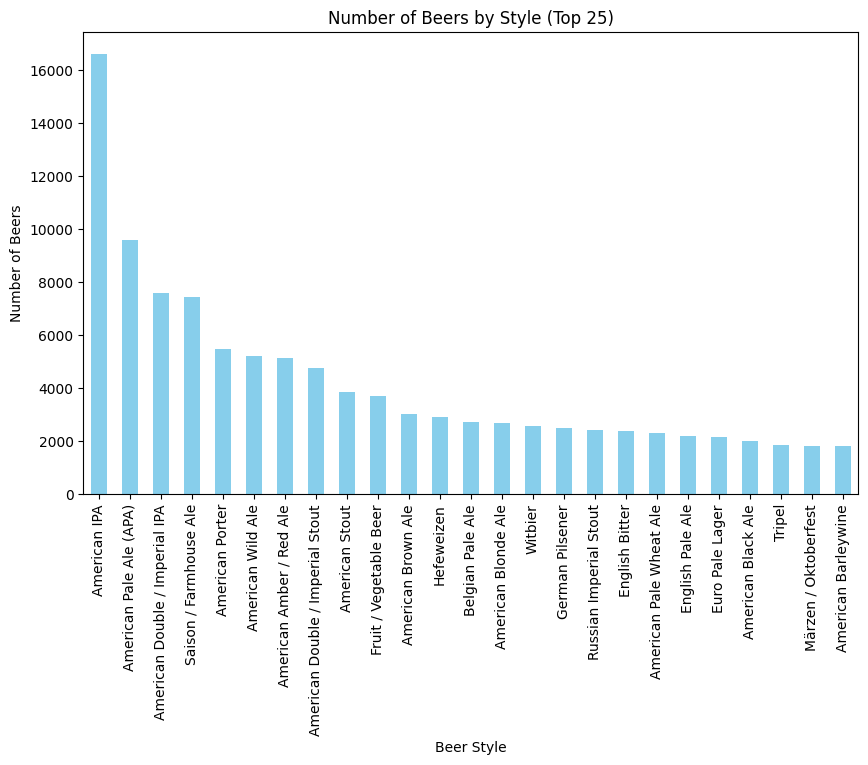

In [80]:
# Count the number of beers per style
style_counts = beer_BA['style'].value_counts()[:25]

# Plot a bar chart of the beer count by style
plt.figure(figsize=(10, 6))
style_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Beers by Style (Top 25)')
plt.xlabel('Beer Style')
plt.ylabel('Number of Beers')
plt.xticks(rotation=90)
plt.show()

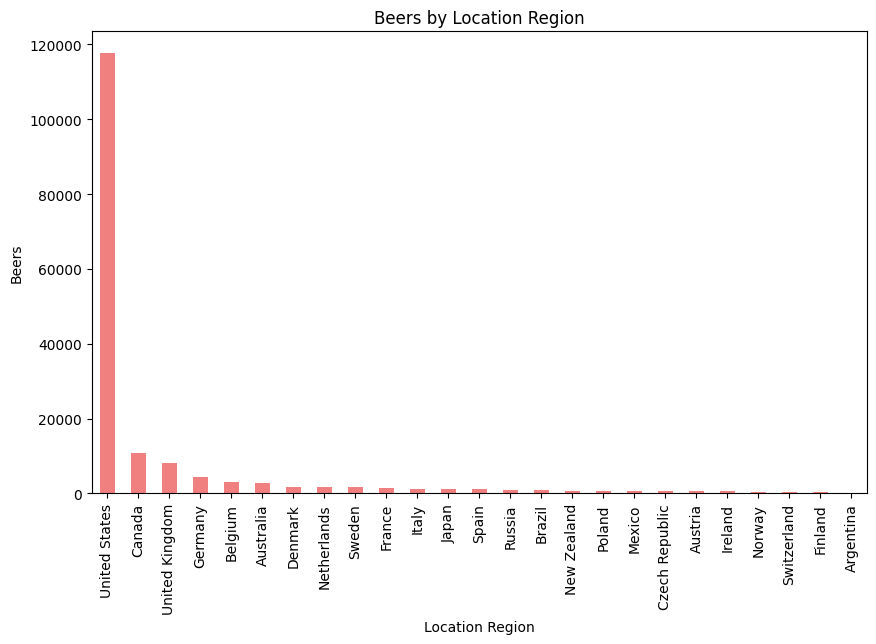

In [82]:
# Count of breweries by region or country
location_counts = beer_BA['location'].value_counts()[:25]

# Plot a bar chart of breweries by region
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='lightcoral')
plt.title('Beers by Location Region')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

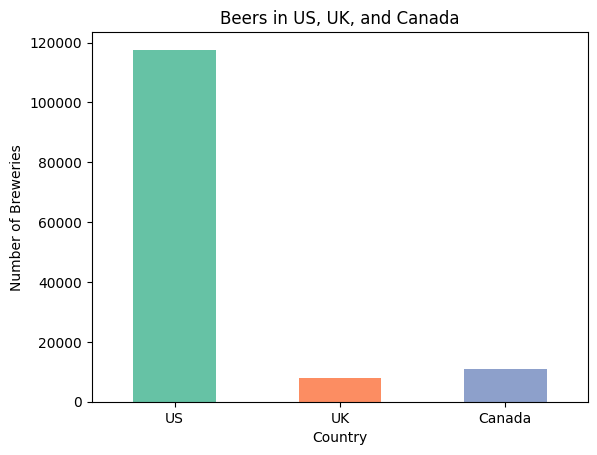

In [84]:
# Count of beers in US, UK, and Canada
country_counts = beer_BA[['US', 'UK', 'Canada']].sum()

# Plot the brewery count by country

palette = sns.color_palette("Set2", n_colors=3)  # "Set2" is a soft color palette, good for categorical data
country_counts.plot(kind='bar', color=palette)
plt.title('Beers in US, UK, and Canada')
plt.xlabel('Country')
plt.ylabel('Number of Breweries')
plt.xticks(rotation=0)
plt.show()

In [86]:
# Top 5 beers with the highest average ratings
top_5_beers = beer_BA.nlargest(5, 'avg')[['beer_name', 'avg']]
print("Top 5 beers with highest average ratings:")
print(top_5_beers, '\n')

# Bottom 5 beers with the lowest average ratings
bottom_5_beers = beer_BA.nsmallest(5, 'avg')[['beer_name', 'avg']]
print("Bottom 5 beers with lowest average ratings:")
print(bottom_5_beers)

Top 5 beers with highest average ratings:
                        beer_name  avg
8488                      Pardela  5.0
15544  Goodes Highland Scotch Ale  5.0
22007              Asteroid 56013  5.0
24956   Wiesbadener 1486 Pale Ale  5.0
24960    Wiesbadener Double Stout  5.0 

Bottom 5 beers with lowest average ratings:
                     beer_name  avg
12159         Bowes Dry Treebu  1.0
13638              NuBru Blend  1.0
19985               Wasabi Dry  1.0
29565               Beer Royal  1.0
30266  Permyakov Lyegkoye Pivo  1.0


BEER ANALYSIS BASED ON LOCATION (WE'LL SEPARATE US FROM OTHERS)

In [87]:
# Calculate mean average score by country
country_avg_score = beer_BA.groupby('location')['avg'].mean()
print(country_avg_score)

location
Albania                  3.150909
Algeria                  2.632857
Andorra                  2.970000
Angola                   2.400000
Antigua & Barbuda        3.020000
                           ...   
Venezuela                2.440000
Vietnam                  3.016071
Virgin Islands (U.S.)    3.542143
Zambia                   2.065000
Zimbabwe                 2.907143
Name: avg, Length: 175, dtype: float64


In [90]:
from scipy.stats import f_oneway

# Extract average scores for each country
us_scores = beer_BA[beer_BA['location'] == 'United States']['avg']
uk_scores = beer_BA[beer_BA['location'] == 'United Kingdom']['avg']
canada_scores = beer_BA[beer_BA['location'] == 'Canada']['avg']

# Perform ANOVA test
anova_result = f_oneway(us_scores, uk_scores, canada_scores)
print(f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA test result: F-statistic = 1199.3849537838898, p-value = 0.0


Statistical significance between beers in Canada, UK and US.

In [89]:
country_counts = beer_BA['location'].value_counts()
print(country_counts)

location
United States     117628
Canada             10795
United Kingdom      8000
Germany             4461
Belgium             3131
                   ...  
Guadeloupe             1
Lesotho                1
Paraguay               1
Iraq                   1
Gabon                  1
Name: count, Length: 175, dtype: int64
